### Mirakl use case - Classification task

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Conclusion

### 1) Problem statement
- The aim of this study is to create a classification algorithm for leaf categories using embeddings of size 128 to represent the various information about a product.

### 2) Data Collection
- Dataset - DataFrame pandas où chaque ligne correspond à un produit.

- The data consists of 130 column and 241483 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

### **2.1.1. Connect to google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_path = "/content/gdrive/MyDrive/Projects_data/Use_Case/data_train_final.csv"
test_path = "/content/gdrive/MyDrive/Projects_data/Use_Case/data_test_final.csv"

### **2.1.2. Read Data**

In [ ]:
data = pd.read_csv(train_path)

#### Show Top 5 Records

In [ ]:
data.head()

,product_id,category_id,f0,f1,f2,f3,f4,f5,f6,f7,...,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127
0,cdc53c8374034e8d41528375097a51c087390292,2081,-0.006559,-0.120659,-0.004383,0.007749,-0.037135,-0.039693,-0.000479,-0.009981,...,0.012074,-0.002464,-0.005398,0.002239,-0.010406,-0.008286,0.007256,0.003646,0.007139,-0.011185
1,7faed7269ff5e13ced9245d23e88cb17e8b4c91b,9820,0.101763,-0.018803,-0.027987,-0.043492,0.096025,0.016519,0.010036,-0.015817,...,-0.001446,-0.002490,-0.006619,-0.018201,-0.025073,-0.019518,0.002237,-0.003276,-0.000349,0.008102
2,c307ce173cac526708f00f509d5250af69e2adcf,15651,-0.040672,-0.078895,-0.051821,-0.011871,-0.020762,0.041655,-0.059276,-0.022324,...,0.005634,-0.000398,0.003627,0.019286,0.005602,-0.009435,0.003241,-0.014601,-0.019980,0.015251
3,49b52f955911fafc4ddc136debb974070568551d,3056,-0.105920,0.043751,0.004357,0.085637,0.011778,-0.019016,-0.083128,0.025109,...,-0.020314,0.001298,0.012358,-0.006352,0.000958,-0.006532,-0.007828,-0.016894,0.004076,0.001585
4,0999ed1b31922ffee4f82526c5069f70d231960e,6933,-0.008389,-0.028736,-0.005999,0.047041,0.011757,-0.037296,-0.033031,0.056991,...,-0.007202,0.006544,-0.006674,0.004217,-0.000845,0.004107,0.001433,-0.003491,-0.016566,0.019101


#### Shape of the dataset

In [ ]:
data.shape

(241483, 130)

### 2.2 Dataset information

- **product_id :** son id
- **category_id :** l’id de sa catégorie feuille
- **features :** un vecteur de dimension 128

### 2.3 Dataset preparation

- In our study, we won't take the following column ("product_id").
- So, I'll delete it

In [ ]:
data.drop("product_id", axis=1, inplace=True)
data.head()

,category_id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127
0,2081,-0.006559,-0.120659,-0.004383,0.007749,-0.037135,-0.039693,-0.000479,-0.009981,-0.035670,...,0.012074,-0.002464,-0.005398,0.002239,-0.010406,-0.008286,0.007256,0.003646,0.007139,-0.011185
1,9820,0.101763,-0.018803,-0.027987,-0.043492,0.096025,0.016519,0.010036,-0.015817,-0.021493,...,-0.001446,-0.002490,-0.006619,-0.018201,-0.025073,-0.019518,0.002237,-0.003276,-0.000349,0.008102
2,15651,-0.040672,-0.078895,-0.051821,-0.011871,-0.020762,0.041655,-0.059276,-0.022324,-0.030532,...,0.005634,-0.000398,0.003627,0.019286,0.005602,-0.009435,0.003241,-0.014601,-0.019980,0.015251
3,3056,-0.105920,0.043751,0.004357,0.085637,0.011778,-0.019016,-0.083128,0.025109,0.037442,...,-0.020314,0.001298,0.012358,-0.006352,0.000958,-0.006532,-0.007828,-0.016894,0.004076,0.001585
4,6933,-0.008389,-0.028736,-0.005999,0.047041,0.011757,-0.037296,-0.033031,0.056991,0.010394,...,-0.007202,0.006544,-0.006674,0.004217,-0.000845,0.004107,0.001433,-0.003491,-0.016566,0.019101


### 3) Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [ ]:
data.isna().sum()

category_id    0
f0             0
f1             0
f2             0
f3             0
              ..
f123           0
f124           0
f125           0
f126           0
f127           0
Length: 129, dtype: int64

**Insight :**
- There is no missing values in the dataset, **WE ARE READY TO GO**

### 3.2 Check Duplicates

In [ ]:
data.duplicated().sum()

2710

**Insight :**
- There is no duplicates values in the dataset, now **WE ARE READY TO GO**

### 3.3 Check data types

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241483 entries, 0 to 241482
Columns: 129 entries, category_id to f127
dtypes: float64(128), int64(1)
memory usage: 237.7 MB


### 3.4 Checking the number of unique values of each column

In [ ]:
data.nunique()

category_id       101
f0             237422
f1             237516
f2             237541
f3             237634
                ...  
f123           237671
f124           237671
f125           237681
f126           237688
f127           237643
Length: 129, dtype: int64

**Insight :**
- There are 101 categories to be classified

### 3.5 Check statistics of data set

In [ ]:
data.describe()

,category_id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127
count,241483.000000,2.414830e+05,2.414830e+05,2.414830e+05,2.414830e+05,2.414830e+05,2.414830e+05,2.414830e+05,2.414830e+05,2.414830e+05,...,2.414830e+05,2.414830e+05,2.414830e+05,2.414830e+05,2.414830e+05,2.414830e+05,2.414830e+05,2.414830e+05,2.414830e+05,2.414830e+05
mean,6952.661363,2.861053e-08,2.010980e-07,-2.481093e-11,-2.623515e-07,-2.622769e-07,-6.081859e-08,-1.121595e-07,-6.476297e-08,9.167130e-08,...,4.846944e-08,2.067574e-08,1.208172e-07,1.192442e-07,-9.068683e-08,4.360788e-08,2.105384e-08,5.476209e-08,-2.215784e-08,-1.188043e-07
std,4548.216962,1.073000e-01,8.986712e-02,7.109181e-02,6.359525e-02,5.616667e-02,5.290368e-02,4.837740e-02,4.489879e-02,4.216261e-02,...,1.177012e-02,1.169050e-02,1.160904e-02,1.156059e-02,1.153511e-02,1.141343e-02,1.140734e-02,1.126701e-02,1.121241e-02,1.114858e-02
min,77.000000,-2.828185e-01,-2.996672e-01,-3.047870e-01,-2.879421e-01,-3.408424e-01,-2.590854e-01,-2.310229e-01,-2.679983e-01,-2.368627e-01,...,-1.106824e-01,-1.308124e-01,-9.134706e-02,-1.230630e-01,-1.129944e-01,-9.481062e-02,-1.077422e-01,-9.839892e-02,-8.927345e-02,-1.016080e-01
25%,2961.000000,-8.109986e-02,-6.571191e-02,-5.129107e-02,-4.296552e-02,-2.894568e-02,-3.826684e-02,-3.027118e-02,-2.867928e-02,-2.637515e-02,...,-6.938770e-03,-6.731007e-03,-6.703882e-03,-6.630881e-03,-6.739346e-03,-6.688827e-03,-6.600620e-03,-6.527720e-03,-6.387617e-03,-6.375655e-03
50%,5662.000000,-2.057287e-02,-6.714902e-03,-3.781046e-04,-6.149987e-03,-1.735508e-03,-4.972435e-03,-4.074312e-03,-2.052517e-03,1.490731e-03,...,-4.716668e-05,5.113779e-05,8.093296e-05,1.039948e-04,1.349261e-04,-8.499221e-05,4.169220e-05,-1.327340e-04,-1.896800e-05,7.142443e-05
75%,10149.000000,6.429002e-02,5.382687e-02,5.117058e-02,3.546761e-02,2.164059e-02,3.416465e-02,2.695938e-02,2.592083e-02,2.786690e-02,...,6.887363e-03,6.747196e-03,6.738361e-03,6.680045e-03,6.803292e-03,6.564638e-03,6.642352e-03,6.531704e-03,6.453670e-03,6.494594e-03
max,16149.000000,4.789809e-01,4.550264e-01,3.535341e-01,3.903084e-01,4.593806e-01,2.624381e-01,4.491417e-01,2.755710e-01,2.506308e-01,...,1.255976e-01,1.391813e-01,9.351389e-02,1.239649e-01,1.536047e-01,1.028293e-01,1.151445e-01,9.858177e-02,1.063332e-01,1.221655e-01


### 4) Exploring Data ( Visualization )

#### 4.1. Correlation

In [ ]:
plt.figure(figsize=(150, 150))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5)
plt.show()

**Insights :**
- The correlation between variables is very low.
- We can see that there is a positive correlation between the target (category_id) and the features **f4**, **f6** and **f15**, but it is weak to be taken into account (between 0.2 and 0.25).

#### 4.2. Distribution of Category IDs

In [ ]:
count = data.category_id.value_counts().values
category_id = list(data.category_id.value_counts().index)

print(len(count))
print(len(category_id))

101
101


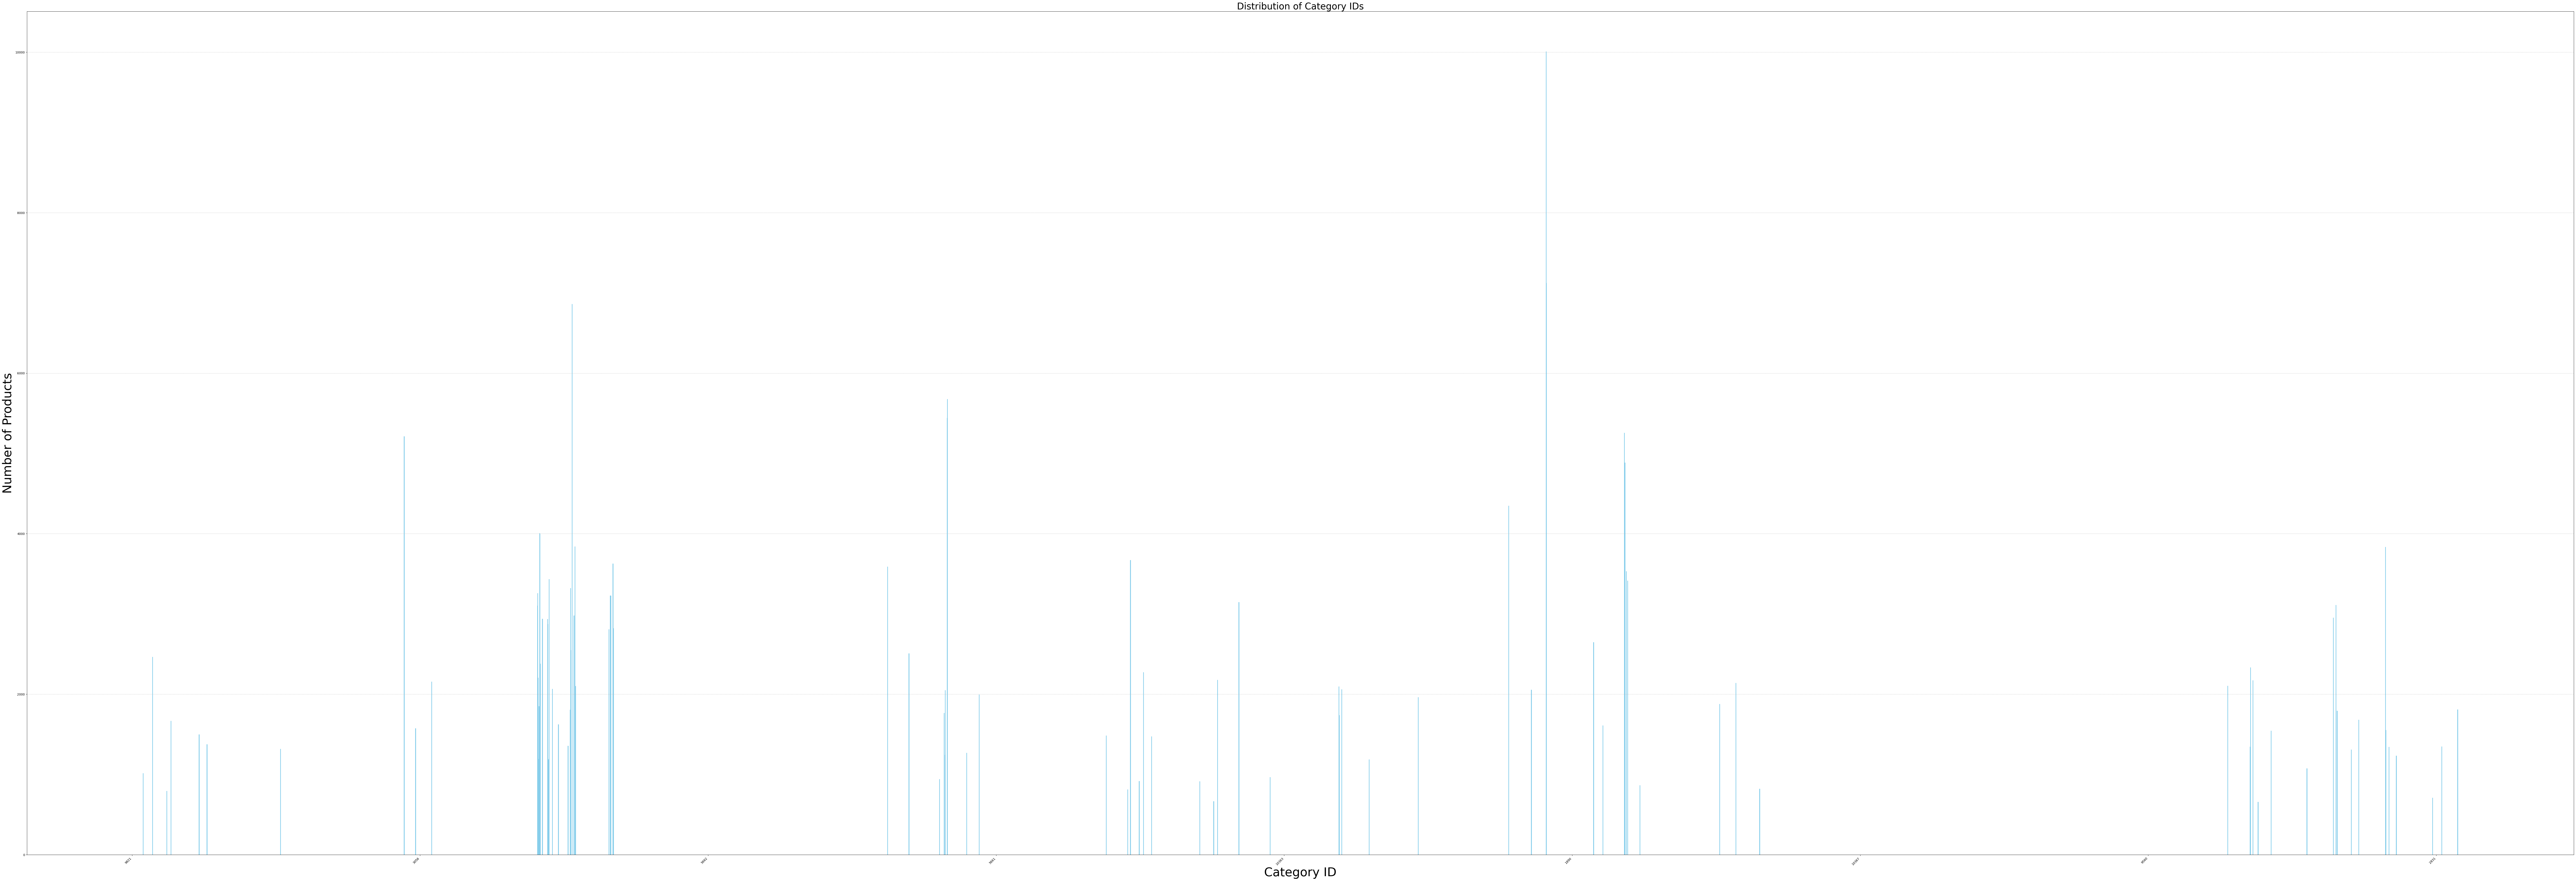

In [ ]:
fig, ax = plt.subplots(figsize=(150, 50))

# Creating the bar plot
plt.bar(category_id, count, width=5, color='skyblue')

ax.set_xlabel("Category ID", fontsize=40)
ax.set_ylabel("Number of Products", fontsize=40)
ax.set_title("Distribution of Category IDs", fontsize=30)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticklabels(category_id, rotation=45, ha='right')

plt.show()

**Insight :**
- The high amount of features make the visualisation difficult.
- As we can see, there is some groups that have the same distribution (represented by peaks).

# **5) Conclusion**

## **Problem**
- The high amount of features make the visualisation difficult, and will slow the training

## **Solution**
- Dimentinality reduction
- Then train the model